### Random zadatak iz zbirke za klimatologiju i primenjenu meteorologiju:
Odrediti početak i kraj vegetacionog perioda i sumu aktivnih temperatura u periodu od1961. do 1990. godine ako je biološki minimum 5,0 °C za Beograd

Prvo ucitamo biblioteke koje cemo koristiti

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

Zatim ucitamo podatke koji se nalaze u csv fajlu

In [2]:
tabela_beograd = pd.read_csv('tabela_klima_311.csv', delimiter=' ')

In [3]:
tabela_beograd

,god.,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,sr.god
0,1961,1.0,3.6,9.4,15.3,14.8,21.4,21.2,21.8,18.9,14.9,8.8,1.1,12.7
1,1962,2.0,0.7,2.9,13.2,18.0,18.9,21.0,23.5,17.6,12.8,7.4,-0.8,11.4
2,1963,-5.2,-1.8,5.0,12.7,17.5,22.2,23.8,24.1,19.2,12.3,12.3,-1.8,11.7
3,1964,-5.5,1.2,4.7,12.7,15.7,22.7,21.2,20.4,16.8,13.3,8.1,2.7,11.2
4,1965,2.0,-2.4,7.6,10.1,16.0,20.1,22.8,19.9,19.1,11.3,6.7,4.8,11.5
5,1966,-2.5,9.1,6.2,14.1,16.7,19.7,21.4,21.4,18.0,17.0,6.4,3.2,12.6
6,1967,-1.5,3.2,8.7,11.5,17.2,19.3,23.1,22.2,19.2,14.9,7.7,0.6,12.2
7,1968,-0.8,5.6,7.4,15.2,19.3,21.3,21.4,19.5,16.9,12.1,8.2,0.3,12.2
8,1969,-1.9,1.7,4.3,11.6,20.2,18.9,20.6,20.6,18.1,12.0,10.8,-1.5,11.2
9,1970,1.1,2.5,6.6,12.6,14.6,20.2,20.8,21.2,16.6,11.1,9.5,2.6,11.6


In [4]:
tabela_beograd = tabela_beograd.set_index('god.')

In [5]:
tabela_beograd

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,sr.god
god.,,,,,,,,,,,,,
1961,1.0,3.6,9.4,15.3,14.8,21.4,21.2,21.8,18.9,14.9,8.8,1.1,12.7
1962,2.0,0.7,2.9,13.2,18.0,18.9,21.0,23.5,17.6,12.8,7.4,-0.8,11.4
1963,-5.2,-1.8,5.0,12.7,17.5,22.2,23.8,24.1,19.2,12.3,12.3,-1.8,11.7
1964,-5.5,1.2,4.7,12.7,15.7,22.7,21.2,20.4,16.8,13.3,8.1,2.7,11.2
1965,2.0,-2.4,7.6,10.1,16.0,20.1,22.8,19.9,19.1,11.3,6.7,4.8,11.5
1966,-2.5,9.1,6.2,14.1,16.7,19.7,21.4,21.4,18.0,17.0,6.4,3.2,12.6
1967,-1.5,3.2,8.7,11.5,17.2,19.3,23.1,22.2,19.2,14.9,7.7,0.6,12.2
1968,-0.8,5.6,7.4,15.2,19.3,21.3,21.4,19.5,16.9,12.1,8.2,0.3,12.2
1969,-1.9,1.7,4.3,11.6,20.2,18.9,20.6,20.6,18.1,12.0,10.8,-1.5,11.2


In [6]:
tabela_beograd.describe()

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,sr.god
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.336667,2.726667,6.996667,12.270000,17.176667,19.983333,21.726667,21.360000,17.803333,12.530000,6.843333,2.316667,11.840000
std,2.604569,2.943483,2.522380,1.684851,1.587382,1.240435,1.228662,1.341281,1.509849,1.527032,2.253225,1.991202,0.544945
min,-5.500000,-3.100000,1.600000,9.100000,14.300000,17.700000,19.800000,18.100000,14.700000,9.200000,1.300000,-1.800000,10.700000
25%,-1.475000,1.225000,5.600000,11.125000,15.850000,19.025000,20.925000,20.400000,16.825000,11.450000,5.700000,1.100000,11.500000
50%,0.700000,2.600000,6.600000,12.100000,17.450000,19.900000,21.400000,21.350000,18.000000,12.200000,7.050000,2.500000,11.800000
75%,2.000000,3.900000,8.975000,12.950000,18.100000,20.850000,22.250000,22.350000,18.725000,13.275000,8.075000,3.475000,12.200000
max,4.900000,9.100000,11.100000,15.300000,20.200000,22.700000,24.800000,24.100000,21.300000,17.000000,12.300000,6.600000,13.000000


In [7]:
tabela_beograd.shape

(30, 13)

In [8]:
tabela_bg_meseci = tabela_beograd.drop('sr.god', axis=1)
tabela_bg_meseci

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII
god.,,,,,,,,,,,,
1961,1.0,3.6,9.4,15.3,14.8,21.4,21.2,21.8,18.9,14.9,8.8,1.1
1962,2.0,0.7,2.9,13.2,18.0,18.9,21.0,23.5,17.6,12.8,7.4,-0.8
1963,-5.2,-1.8,5.0,12.7,17.5,22.2,23.8,24.1,19.2,12.3,12.3,-1.8
1964,-5.5,1.2,4.7,12.7,15.7,22.7,21.2,20.4,16.8,13.3,8.1,2.7
1965,2.0,-2.4,7.6,10.1,16.0,20.1,22.8,19.9,19.1,11.3,6.7,4.8
1966,-2.5,9.1,6.2,14.1,16.7,19.7,21.4,21.4,18.0,17.0,6.4,3.2
1967,-1.5,3.2,8.7,11.5,17.2,19.3,23.1,22.2,19.2,14.9,7.7,0.6
1968,-0.8,5.6,7.4,15.2,19.3,21.3,21.4,19.5,16.9,12.1,8.2,0.3
1969,-1.9,1.7,4.3,11.6,20.2,18.9,20.6,20.6,18.1,12.0,10.8,-1.5


Prvo izračunamo normalnu mesečnu temperaturu vazduha za svaki mesec u godinikao aritmetičku sredinu srednjih mesečnih vrednosti temperature u periodu od 1961. do 1990.godine:

In [9]:
avg = tabela_bg_meseci.mean()
avg

I        0.336667
II       2.726667
III      6.996667
IV      12.270000
V       17.176667
VI      19.983333
VII     21.726667
VIII    21.360000
IX      17.803333
X       12.530000
XI       6.843333
XII      2.316667
dtype: float64

Sada cemo da nacrtamo grafik srednjih temperatura. Pandas interno koristi biblioteku **matplotlib** za grafiku. 

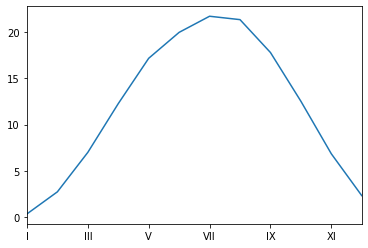

In [10]:
avg.plot()

Medjutim mi ne mozemo bas mnogo da procitamo sa ovakvog grafika pa treba ipak malo da ga stilizujemo koristeci matplotlib direktno.

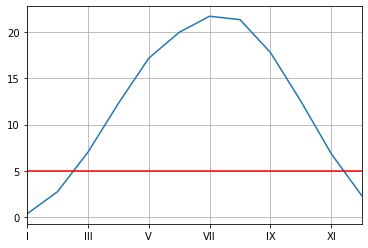

In [11]:
avg.plot()
plt.axhline(y=5, color='r', linestyle='-')
plt.grid()

I dalje ne vidimo lepo datume pa cemo da napravimo novi data frame samo sa datumima i spojiti sa nasom tabelom.

In [12]:
date_rng = pd.DataFrame(pd.date_range('2018-01-01', periods=12, freq='MS') + pd.DateOffset(days=14), columns=['Date'])
date_rng

,Date
0,2018-01-15
1,2018-02-15
2,2018-03-15
3,2018-04-15
4,2018-05-15
5,2018-06-15
6,2018-07-15
7,2018-08-15
8,2018-09-15
9,2018-10-15


In [13]:
avg = avg.reset_index()
new = pd.concat([avg[0], date_rng], axis=1, sort=False)
new = new.set_index('Date')
new

,0
Date,
2018-01-15,0.336667
2018-02-15,2.726667
2018-03-15,6.996667
2018-04-15,12.270000
2018-05-15,17.176667
2018-06-15,19.983333
2018-07-15,21.726667
2018-08-15,21.360000
2018-09-15,17.803333


<IPython.core.display.Javascript object>


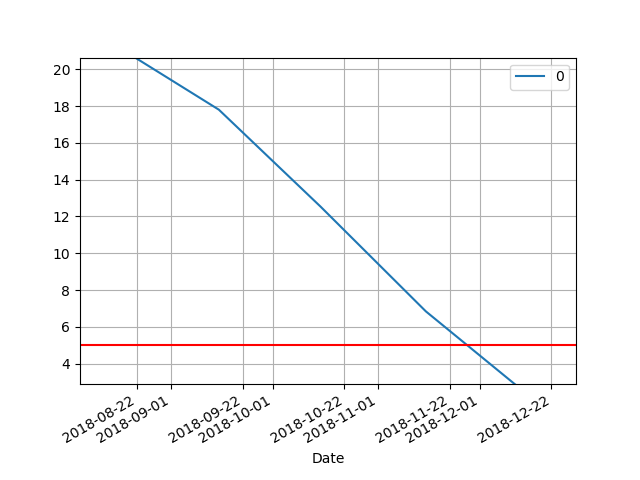

In [14]:
%matplotlib notebook
new.plot()
plt.axhline(y=5, color='r', linestyle='-')
plt.grid()

Prvi  presek  izoterme  od  5,0  °C  i  normalnog  godišnjeg  toka  temperature  predstavljapočetak,  a  drugi  presek  kraj  vegetacionog  perioda  za  biološki  minimum  od  5,0  °C  i  njih pročitamo  sa  grafika.  Sa  slike  se  vidi  da  je  za  Beograd  početak  vegetacionog  perioda 1. marta, a kraj vegetacionog perioda 28. novembra.

Aktivne temperature za mart i novembar računamo na sledeći način:


\begin{align}
T_a & = \frac{(a + b) \cdot h}{2}
\end{align}

gde  su a i b  -  temperature  koje  odgovaraju  početku  i  kraju  vegetacionog  perioda,  *h*  –  broj dana  od  početka  do  kraja  vegetacionog  perioda  i  Ta –  aktivna  temperatura  za  posmatrani mesec.

In [15]:
Ta_III = (5 + 9.7)*29/2
Ta_IX = (9.3 + 5)*28/2
print('Ta_III =  {0:4.2f}, a Ta_IX = {0:4.2f}'.format(Ta_III,Ta_IX))

Ta_III =  213.15, a Ta_IX = 213.15


Za ostale mesece moramo da znamo broj dana u mesecu. Pomocice nam biblioteka **calendar**

In [16]:
from calendar import monthrange
monthrange(1990, 2)

(3, 28)

Prvi broj u ovom Tuple-u je dan u nedelji kad je poceo taj mesec a drugi je broj dana. Nama treba broj dana tako da cemo uzeti samo drugi element.

In [18]:
Ta = Ta_III + Ta_IX
for i in range(4,11):
    broj_dana_u_mesecu = monthrange(1989,i)[1]
    Tsr = avg[0][i-1]
    print(Tsr)
    Ta_i = Tsr * broj_dana_u_mesecu
    Ta = Ta + Ta_i
Ta

12.270000000000003
17.176666666666666
19.983333333333338
21.726666666666663
21.36
17.803333333333338
12.53


4171.643333333333